In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("04_store_member.csv")

In [3]:
df2 = pd.read_csv("04_store_product_1.csv")

In [4]:
df1.head()

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0


In [5]:
df2.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.0,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.0,99999999,매장1,NaN,2102
2,20170201,110104033,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000,매장1,NaN,2103
3,20170201,40203001,과실,견과,잣,잣(220g:1병),1.0,14800,매장1,NaN,2105
4,20170201,50417002,채소,뿌리채소,우엉,우엉(300g),1.0,3400,매장1,NaN,2105


In [6]:
df1.columns.intersection(df2.columns)

Index(['회원번호'], dtype='object')

In [9]:
df3 = df2.pivot_table(index="회원번호", values=["구매수량", "구매금액"], aggfunc="sum").reset_index()

In [10]:
df3

,회원번호,구매금액,구매수량
0,2102,102093159,472.5
1,2103,7904400,1586.4
2,2104,389040,112.0
3,2105,3067930,602.0
4,2106,54550,25.0
...,...,...,...
1378,6471,1600,1.0
1379,6474,709400,175.0
1380,6478,2600,1.0
1381,6489,22100,14.0


In [13]:
df1.isnull().sum()

회원번호      0
회원상태      1
성별        3
결혼유무    947
주소        0
생년        3
dtype: int64

In [12]:
pd.merge(df1, df3, on="회원번호", how="inner").isnull().sum()

회원번호      0
회원상태      0
성별        1
결혼유무    288
주소        0
생년        2
구매금액      0
구매수량      0
dtype: int64

In [14]:
df4 = pd.merge(df1, df3, on="회원번호", how="inner")

In [18]:
# 연령 = 현재연도 - 고객생년
df4["연령"] = 2023 - df4["생년"]

In [19]:
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회원번호    1383 non-null   int64  
 1   회원상태    1383 non-null   object 
 2   성별      1382 non-null   object 
 3   결혼유무    1095 non-null   object 
 4   주소      1383 non-null   object 
 5   생년      1381 non-null   float64
 6   구매금액    1383 non-null   int64  
 7   구매수량    1383 non-null   float64
 8   연령      1381 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 108.0+ KB


In [24]:
df4["성별"].value_counts()

여    1270
남     112
Name: 성별, dtype: int64

<Axes: xlabel='성별', ylabel='구매금액'>

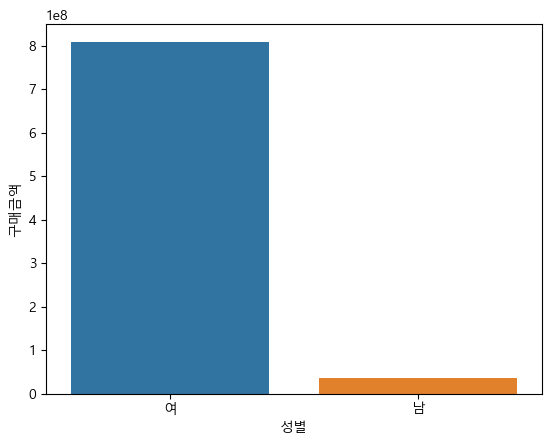

In [23]:
sns.barplot(data=df4, x="성별", y="구매금액", errorbar=None, estimator="sum")

In [27]:
pd.options.display.float_format = "{:.2f}".format
df4["연령"].describe()

count      1381.00
mean        -85.85
std        5327.94
min     -197914.00
25%          45.00
50%          52.00
75%          61.00
max        1830.00
Name: 연령, dtype: float64

<Axes: xlabel='연령', ylabel='구매수량'>

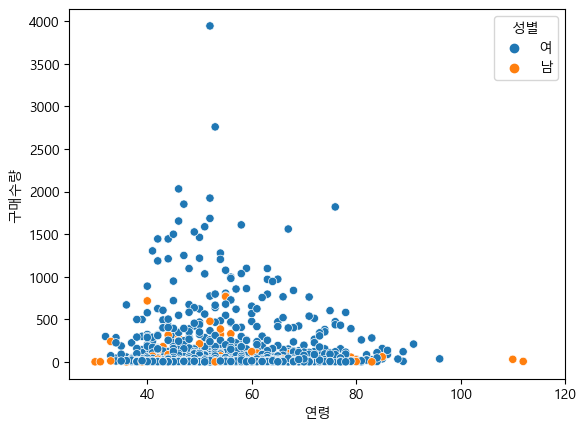

In [30]:
# 40-50대 고객의 구매력이 강하다.
plt.xlim([25, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량", hue="성별")